In [1]:
# Import Dependencies
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("Training.csv")
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [3]:
df = data['prognosis'].value_counts().rename_axis('unique_values').reset_index(name='counts')
df = pd.DataFrame(df)
df.head()

,unique_values,counts
0,Fungal infection,120
1,Hepatitis C,120
2,Hepatitis E,120
3,Alcoholic hepatitis,120
4,Tuberculosis,120


In [4]:
w = data['prognosis'].value_counts()
import plotly.express as px
fig = px.pie(df,values='counts', names='unique_values')
fig.show()

d:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

d:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

d:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



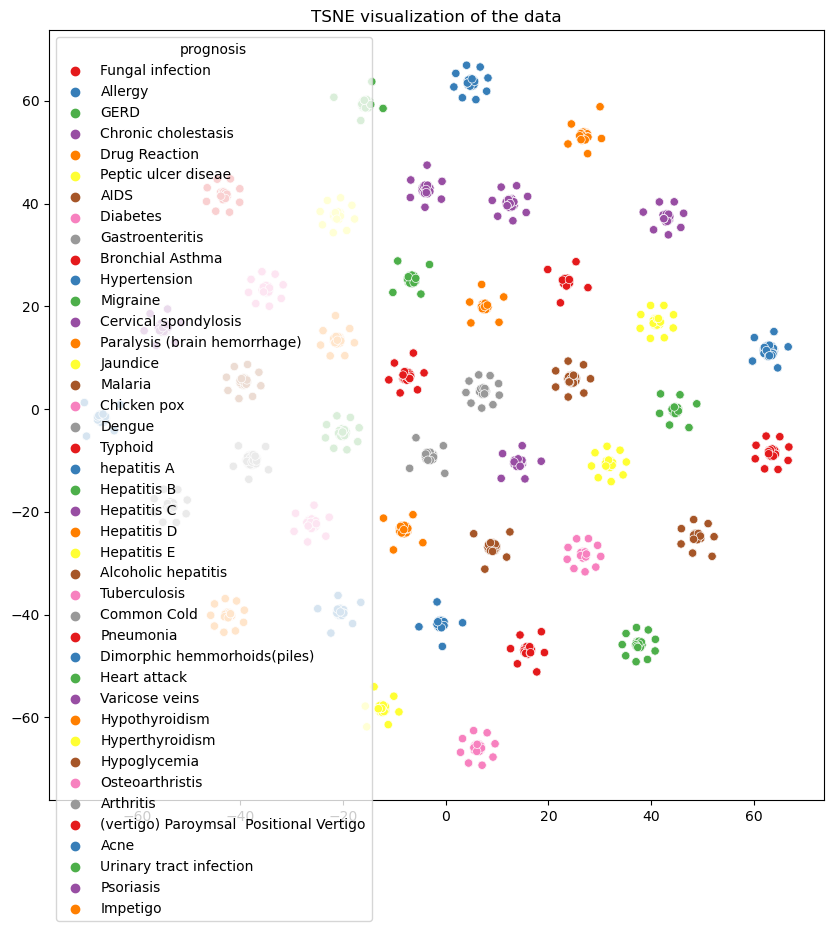

In [6]:
# use tsne to visualize the data in 2D
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X = data.drop(['prognosis'], axis=1)
y = data['prognosis']
X_2d = tsne.fit_transform(X)
plt.figure(figsize=(10,10))
sns.scatterplot(X_2d[:,0], X_2d[:,1], hue=y, legend='full', palette='Set1')
plt.title('TSNE visualization of the data')
plt.show()


In [7]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

clf_pipe = Pipeline([
    ('ensemble', VotingClassifier(estimators=[
        ('mnb', MultinomialNB()),
        ('rf', RandomForestClassifier()),
    ], voting='soft'))
])

# define parameters for the grid search
params = {
    'ensemble__mnb__alpha': [0.1, 0.5, 1.0],
    'ensemble__rf__n_estimators': [100, 200, 300],
    'ensemble__rf__max_depth': [10, 20, 30],
}

# define the grid search
clf = RandomizedSearchCV(clf_pipe, params, cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=3), n_iter=10, n_jobs=-1, verbose=1)

In [8]:
# split trainnig and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(['prognosis'], axis=1), data['prognosis'], test_size=0.3, random_state=42)

In [9]:
from pprint import pprint

# fit the grid search on the training data
clf.fit(X_train, y_train)

print("Best Score: ", clf.best_score_)
print("Best Params: ", end="")
pprint(clf.best_params_)

Fitting 15 folds for each of 10 candidates, totalling 150 fits
Best Score:  1.0
Best Params: {'ensemble__mnb__alpha': 0.5,
 'ensemble__rf__max_depth': 30,
 'ensemble__rf__n_estimators': 100}


In [10]:
from sklearn.metrics import classification_report

# predict the target on the test data
y_pred = clf.predict(X_test)

In [11]:
# print classification report
print(classification_report(y_test, y_pred))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        32
                                   AIDS       1.00      1.00      1.00        39
                                   Acne       1.00      1.00      1.00        41
                    Alcoholic hepatitis       1.00      1.00      1.00        36
                                Allergy       1.00      1.00      1.00        35
                              Arthritis       1.00      1.00      1.00        36
                       Bronchial Asthma       1.00      1.00      1.00        44
                   Cervical spondylosis       1.00      1.00      1.00        32
                            Chicken pox       1.00      1.00      1.00        35
                    Chronic cholestasis       1.00      1.00      1.00        30
                            Common Cold       1.00      1.00      1.00        31
                           

In [12]:
y_pred = clf.predict(X_test)

In [13]:
 # save the model
import pickle

with open('model.pkl', 'wb') as f:
     pickle.dump(clf, f)

In [14]:
 # load the model
with open('model.pkl', 'rb') as f:
    clf = pickle.load(f)

In [15]:
# use Logistic Regression to predict the target variable and output the probabilities

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
# get the probabilities
y_pred_proba = clf.predict_proba(X_test)


array([[1.22808611e-03, 2.83049596e-03, 9.20279014e-01, ...,
        3.00140248e-03, 1.58406980e-03, 4.13225204e-04],
       [1.70227182e-04, 3.75490345e-04, 9.89681822e-01, ...,
        3.96491089e-04, 2.17522351e-04, 5.85306105e-05],
       [4.22994046e-05, 1.40963799e-04, 1.82123188e-04, ...,
        1.91949795e-04, 2.22990497e-04, 6.21754974e-05],
       ...,
       [2.47720978e-04, 2.34021313e-04, 2.26530922e-04, ...,
        2.47724443e-04, 1.14461556e-04, 3.52243957e-05],
       [5.68839030e-05, 1.74076521e-04, 1.87623456e-04, ...,
        2.06504651e-04, 2.52151987e-04, 1.77737635e-05],
       [8.62838785e-04, 2.02390803e-04, 3.24345368e-04, ...,
        7.08377112e-05, 1.71079095e-04, 7.91633186e-04]])